# ДЗ2: Уравнение Ван-дер-Ваальса и численное интегрирование

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Первая часть: нахождение такого p*, что площади закрашенных фигур под изобарой и над ней равны 

In [16]:
t1 = 0.9
def p(v, tau):
    res = -3/v**2 + ((8/3)*tau)/(v - 1/3)
    return res

<IPython.core.display.Javascript object>


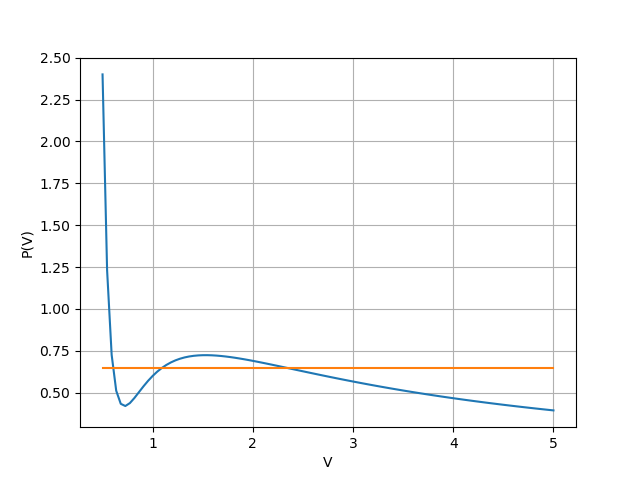

[0.60338743 1.09071057 2.3482087 ]


Text(0,0.5,'P(V)')

In [17]:
v = np.linspace(0.5, 5, 100)
plt.plot(v, p(v, t1))
y = search(p, t1, 0.64, 1.2, 100, 1e-8)*np.ones(100)
plt.plot(v, y) 
plt.grid()
plt.xlabel('V')
plt.ylabel('P(V)')

In [5]:
def comp_matrix(p, tau):
    return np.asarray([[0, 0, 1/p], [1, 0, -3/p], [0, 1,(8*tau+p)/(3*p)]])
def solve_eq(p, tau):
    eig_v =  np.linalg.eig(comp_matrix(p, tau))[0]
    return eig_v

In [6]:
#p = 0.61
t = 0.9
print('Корни:', solve_eq(0.61, t), "Проверка:", np.roots(np.asarray([0.61, -(0.5+8*t)/3, 3, -1])), sep='\n')


Корни:
[0.61047985 1.01710642 2.64017329]
Проверка:
[2.50644146 1.11418622 0.58702259]


In [7]:
def integration(func, t, a, b, n):
    x = np.linspace(a, b, n)
    f = np.array(func(x, t))
    b = []
    for i in range(len(x)-1):
        b.append((f[i]+f[i+1])*(x[i+1] - x[i])/2)
    return sum(np.array(b))

In [8]:
def search(f, tau, a, b, n, tol):
    p_min = p(a, tau)
    p_max = p(b, tau)
    while abs(p_max - p_min)/2 > tol:
        p0 = (p_min + p_max)/2
        if integration(f, tau, solve_eq(p0, tau)[0], solve_eq(p0, tau)[2], n) == p0*abs(solve_eq(p0, tau)[2] - solve_eq(p0, tau)[0]):
            return p0 
        elif integration(f, tau, solve_eq(p0, tau)[0], solve_eq(p0, tau)[2], n) > p0*abs(solve_eq(p0, tau)[2] - solve_eq(p0, tau)[0]):
            p_min = p0
        else:
            p_max = p0 
    print(solve_eq(p0, tau))
    return p0

In [9]:
search(p, t1, 0.64, 1.2, 100, 1e-8)

[0.60338743 1.09071057 2.3482087 ]


0.6470793297448387

In [10]:
S = search(p, t1, 0.64, 1.2, 100, 1e-6)*abs(0.60338741-2.34820759)
print("Значение интеграла:", integration(p, t1, 0.60338743, 2.3482087, 1000))
print("Площадь прямоугольника:", S)

[0.60338728 1.09071249 2.34820209]
Значение интеграла: 1.128897850986435
Площадь прямоугольника: 1.1290385462970518


## Численное интегрирование 

Нужно посчитать следующий интеграл:
$$\int_{0}^{{\pi^2} \over 4} {1\over{\sin {\sqrt{x}}}} dx$$

Разобьем его на два интеграла, вычитая и прибавляя $${1\over {\sqrt{x}}}$$

In [12]:
from scipy import integrate 
def f11(t, x):
    return t/np.sin(np.sqrt(x)) - t/np.sqrt(x)
def f12(t, x):
    return t/np.sqrt(x)
k10 = integration(f11, 1, 0, (np.pi**2)/4, 10) + integration(f12, 1, 0, (np.pi**2)/4, 10)
k100 = integration(f11, 1, 0, (np.pi**2)/4, 100) + integration(f12, 1, 0, (np.pi**2)/4, 100)
k1000 = integration(f11, 1, 0, (np.pi**2)/4, 1000) + integration(f12, 1, 0, (np.pi**2)/4, 1000)
k10000 = integration(f11, 1, 0, (np.pi**2)/4, 10000) + integration(f12, 1, 0, (np.pi**2)/4, 10000)
delta10 = abs(k10000-k10)/k10000
delta100 = abs(k10000-k100)/k10000
delta1000 = abs(k10000-k1000)/k10000
print('Интеграл, посчитанный трапециями (n=10):', k10) 
print('Интеграл, посчитанный трапециями (n=100):', k100) 
print('Интеграл, посчитанный трапециями (n=1000):', k1000) 
print('Интеграл, посчитанный трапециями (n=10000):', k10000)
print('Проверка:', integrate.quad(lambda x: 1/np.sin(np.sqrt(x)), 0, (np.pi**2)/4)[0])
print('Скорость сходимости:', 'n=10', delta10, 'n=100', delta100, 'n=1000', delta1000, sep='\n')

Интеграл, посчитанный трапециями (n=10): 3.6175152200969984
Интеграл, посчитанный трапециями (n=100): 3.6175152200969984
Интеграл, посчитанный трапециями (n=1000): 3.617515220096999
Интеграл, посчитанный трапециями (n=10000): 3.617515220096996
Проверка: 3.6638623767088663
Скорость сходимости:
n=10
6.138042037569579e-16
n=100
6.138042037569579e-16
n=1000
7.365650445083495e-16


Нужно посчитать следующий интеграл:
$$\int_{0}^{1} {{1+x^2}\over\sqrt{1-x^2}} dx$$
Чуть отступим от 1

In [13]:
def midpoint_integration(f, a, b, n):
    s = 0
    x_int = ((2 * n + 1) * a - b) / (2 * n)
    int = (b - a) / n
    for k in range(1, n + 1):
        x = x_int + (k * int)
        s += f(x)
    return s * int
a10 = midpoint_integration(lambda x: (1+x**2)/np.sqrt(1-x**2), 0, 1-(1e-7), 10)
a100 = midpoint_integration(lambda x: (1+x**2)/np.sqrt(1-x**2), 0, 1-(1e-7), 100)
a1000 = midpoint_integration(lambda x: (1+x**2)/np.sqrt(1-x**2), 0, 1-(1e-7), 1000)
c = midpoint_integration(lambda x: (1+x**2)/np.sqrt(1-x**2), 0, 1-(1e-7), 10000)
d10 = abs(a10-c)/c
d100 = abs(a100-c)/c
d1000 = abs(a1000-c)/c
print('n=10', a10, 'дельта', d10)
print('n=10', a100, 'дельта', d100)
print('n=10', a1000, 'дельта', d1000)
print('Проверка:', integrate.quad(lambda x: (1+x**2)/np.sqrt(1-x**2), 0, 1)[0])

n=10 2.083657389631643 дельта 0.1124331433005977
n=10 2.270581031713359 дельта 0.0328100583007156
n=10 2.3291298812117107 дельта 0.007870248823781798
Проверка: 2.3561944901923093
